In [24]:
import numpy as np
import pandas as pd
import json


In [56]:

raw_data = json.load(open(r"C:\Users\anton\Desktop\Master-Oppgave\Kode\New_Traffic\JSON\volume_w_id.json"))


In [57]:

def flatten(item):
    return [
        {
            "id": item["data"]["trafficData"]["trafficRegistrationPoint"]["id"],
            "name": item["data"]["trafficData"]["trafficRegistrationPoint"]["name"],
            "lat": item["data"]["trafficData"]["trafficRegistrationPoint"]["location"]["coordinates"]["latLon"]["lat"],
            "lon": item["data"]["trafficData"]["trafficRegistrationPoint"]["location"]["coordinates"]["latLon"]["lon"],
            "date_from": edge["node"]["from"],
            "date_to": edge["node"]["to"],
            "volume": edge["node"]["total"]["volumeNumbers"]["volume"] if edge["node"]["total"]["volumeNumbers"] else np.nan,
        }
        for edge in item["data"]["trafficData"]["volume"]["byHour"]["edges"]
        if edge
    ]


In [58]:

data = []
for item in raw_data:
    data.extend(flatten(item))



In [59]:

df = pd.DataFrame(data)
df.head()


,id,name,lat,lon,date_from,date_to,volume
0,41379V1201935,MESNADALSARMEN,61.115044,10.456279,2019-10-24T12:00:00+02:00,2019-10-24T13:00:00+02:00,916.0
1,41379V1201935,MESNADALSARMEN,61.115044,10.456279,2019-10-24T13:00:00+02:00,2019-10-24T14:00:00+02:00,966.0
2,43294V181263,MEHEIA STASJON,59.629705,9.499576,2019-10-24T12:00:00+02:00,2019-10-24T13:00:00+02:00,264.0
3,43294V181263,MEHEIA STASJON,59.629705,9.499576,2019-10-24T13:00:00+02:00,2019-10-24T14:00:00+02:00,360.0
4,68771V2258479,KLINESTAD,59.164143,10.199460,2019-10-24T12:00:00+02:00,2019-10-24T13:00:00+02:00,1947.0


In [29]:
df.groupby(["id", "name", "date_from"])["volume"].sum().reset_index()
pivot_table = df.pivot_table(index=["date_from"], columns=["id", "name"], values="volume")


In [7]:
pivot_table.head()

id,00000V1702725,00000V1702751,00000V1796947,00000V443295,00000V443437,00185V249528,00344V521377,00378V444233,00509V885112,00598V1060635,...,98936V121303,98963V1719019,99015V249528,99160V930279,99179B803039,99246V443317,99254V1696548,99593V72151,99846V2429627,99999V2568304
name,SKIBÅSEN,Timenes,ASS TJUVDALEN PÅRAMPE,Drengsrud ved Liahagen bru,E16 BROVOLL,Lønset,Bambletunnelen syd,IKEA,NORDLANDSPORTEN,LEIRA,...,Vesterbrua,Sandesund sør,Hjelset Ø.,HØYBUKTMOEN E6,Fjøsanger sykkel,LYSAKERLOKKET KOLLEKTIV,Troldhaugtunnelen - Lagunen,Korporalsbrua,Lavangsdalen v/værstasjon,Remmem
date_from,,,,,,,,,,,,,,,,,,,,,
2019-10-24T12:00:00+02:00,1026.0,3135.0,104.0,2712.0,233.0,371.0,703.0,5079.0,59.0,533.0,...,1014.0,2640.0,302.0,92.0,4.0,15.0,661.0,289.0,237.0,252.0
2019-10-24T13:00:00+02:00,1101.0,3253.0,114.0,3071.0,284.0,416.0,775.0,5553.0,61.0,683.0,...,1196.0,2870.0,314.0,102.0,10.0,11.0,677.0,307.0,252.0,261.0


In [30]:
pivoted_df = df.pivot(index='id', columns=('date_from'), values=('volume'))


In [31]:
pivoted_df.head()

date_from,2019-10-24T12:00:00+02:00,2019-10-24T13:00:00+02:00
id,,
00000V1702725,1026.0,1101.0
00000V1702751,3135.0,3253.0
00000V1796947,104.0,114.0
00000V443295,2712.0,3071.0
00000V443437,233.0,284.0


In [32]:
pivoted_df = pivoted_df.assign(lat=df.groupby('id').first()['lat'].tolist(), 
                              lon=df.groupby('id').first()['lon'].tolist())


In [49]:
pivoted_df.head()
pivoted_df.columns

Index(['2019-10-24T12:00:00+02:00', '2019-10-24T13:00:00+02:00', 'lat', 'lon'], dtype='object', name='date_from')

In [34]:
import osmnx as ox
import networkx as nx
import pandas as pd

In [60]:
no_dupes=df.drop_duplicates()




In [61]:
no_dupes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 0 to 1293
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1294 non-null   object 
 1   name       1294 non-null   object 
 2   lat        1294 non-null   float64
 3   lon        1294 non-null   float64
 4   date_from  1294 non-null   object 
 5   date_to    1294 non-null   object 
 6   volume     1231 non-null   float64
dtypes: float64(3), object(4)
memory usage: 80.9+ KB


*#USING NETWORK X*

In [112]:

def plot_points_nx(df):
    # Create a graph object
    G = nx.Graph()
    
    # Add nodes to the graph with latitude and longitude as attributes
    for index, row in df.iterrows():
        G.add_node(index, pos=(row['lon'], row['lat']))
    
    # Draw the graph
    nx.draw(G, nx.get_node_attributes(G, 'pos'), node_size=10, node_color='red')


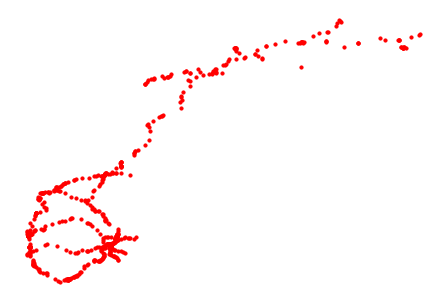

In [113]:
plot_points_nx(pivoted_df)

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 


*#Trying to add edges based on distance*


In [36]:
def plot_points_nx(df):
    # Create a graph object
    G = nx.Graph()
    
    # Add nodes to the graph with latitude and longitude as attributes
    for index, row in df.iterrows():
        G.add_node(index, pos=(row['lon'], row['lat']))
    
    # Draw the graph
    nx.draw(G, nx.get_node_attributes(G, 'pos'), node_size=10, node_color='red')


    # Compute the Euclidean distance between each pair of nodes
    pos = nx.get_node_attributes(G, 'pos')
    node_positions = np.array([pos[node] for node in G.nodes()])
    distances = np.sqrt(np.sum((node_positions[:, np.newaxis, :] - node_positions[np.newaxis, :, :])**2, axis=-1))
    
    # Add an edge between the closest pair of nodes
    for i in range(len(G)):
        closest_neighbor = np.argmin(distances[i, np.arange(len(G)) != i])
        G.add_edge(i, closest_neighbor)
    
    # Draw the graph
    nx.draw(G, nx.get_node_attributes(G, 'pos'), node_size=10, node_color='red')
    plt.show()

In [ ]:
plot_points_nx(pivoted_df)

In [64]:
import networkx as nx
import numpy as np
from scipy.spatial import KDTree

def plot_points_nx(df):
    # Create a graph object
    G = nx.Graph()
    
    # Add nodes to the graph with latitude and longitude as attributes
    for index, row in df.iterrows():
        if not np.isnan(row['lon']) and not np.isnan(row['lat']):
            G.add_node(index, pos=(row['lon'], row['lat']))
    
    # Compute the Euclidean distance between each pair of nodes
    pos = nx.get_node_attributes(G, 'pos')
    node_positions = np.array([pos[node] for node in G.nodes()])
    tree = KDTree(node_positions)
    distances, indices = tree.query(node_positions, k=2)
    
    # Add an edge between the closest pair of nodes
    for i, (d, closest_neighbor) in enumerate(zip(distances, indices)):
        G.add_edge(i, closest_neighbor[1])
    
    # Draw the graph
    nx.draw(G, nx.get_node_attributes(G, 'pos'), node_size=5, node_color='red')
    plt.show()


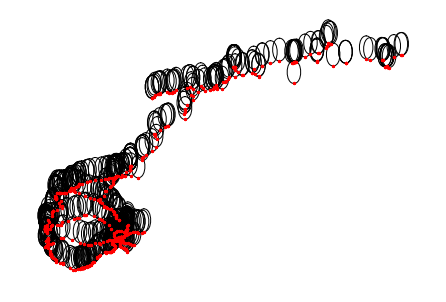

In [65]:
plot_points_nx(no_dupes)

In [80]:
def plot_points_nx(df):
    G = nx.Graph()
    connected = set()

    # Add nodes to the graph
    for i, row in df.iterrows():
        G.add_node(i, pos=(row['lon'], row['lat']))

    # Add an edge between the closest pair of nodes
    for i in range(len(G)):
        for j in range(i + 1, len(G)):
            if j not in connected:
                G.add_edge(i, j)
                connected.add(i)

    # Draw the graph
    nx.draw(G, nx.get_node_attributes(G, 'pos'), node_size=10, node_color='red')
    plt.show()


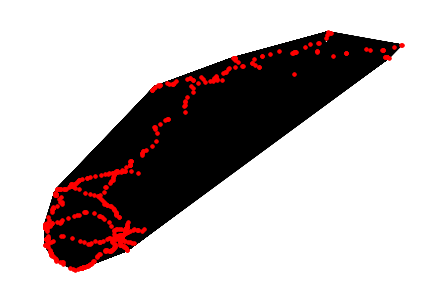

In [81]:
plot_points_nx(no_dupes)

In [103]:
import networkx as nx
import numpy as np
from scipy.spatial import KDTree

def plot_points_nx(df):
    # Create a graph object
    G = nx.Graph()
    
    # Add nodes to the graph with latitude and longitude as attributes
    for index, row in df.iterrows():
        if not np.isnan(row['lon']) and not np.isnan(row['lat']):
            G.add_node(index, pos=(row['lon'], row['lat']))
    
    # Compute the Euclidean distance between each pair of nodes
    pos = nx.get_node_attributes(G, 'pos')
    node_positions = np.array([pos[node] for node in G.nodes()])
    tree = KDTree(node_positions)
    distances, indices = tree.query(node_positions, k=2)
    
    # Add an edge between the closest pair of nodes, excluding circular edges
    for i, (d, closest_neighbors) in enumerate(zip(distances, indices)):
        if not G.has_edge(i, closest_neighbors[1]):
            G.add_edge(i, closest_neighbors[1])
            
       
    
    # Draw the graph (draw_networkx)
    nx.draw(G, nx.get_node_attributes(G, 'pos'), node_size=5, node_color='red')
    
    plt.figure(figsize=(40, 25))
    plt.show()




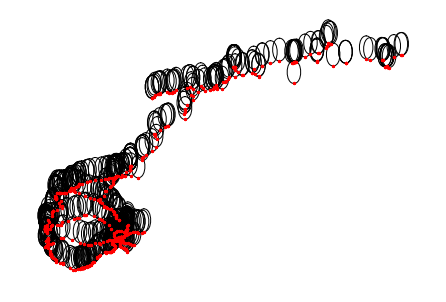

<Figure size 2880x1800 with 0 Axes>

<Figure size 2880x1800 with 0 Axes>

<Figure size 2880x1800 with 0 Axes>

In [105]:
plot_points_nx(no_dupes)


In [83]:
def plot_points_nx(df):
    # Create a graph object
    G = nx.Graph()
    
    # Add nodes to the graph with latitude and longitude as attributes
    for index, row in df.iterrows():
        if not np.isnan(row['lon']) and not np.isnan(row['lat']):
            G.add_node(index, pos=(row['lon'], row['lat']))
    
    # Compute the Euclidean distance between each pair of nodes
    pos = nx.get_node_attributes(G, 'pos')
    node_positions = np.array([pos[node] for node in G.nodes()])
    tree = KDTree(node_positions)
    distances, indices = tree.query(node_positions, k=2)
    
    # Add an edge between the closest pair of nodes
    for i, (d, closest_neighbor) in enumerate(zip(distances, indices)):
        if i != closest_neighbor[1]:
            G.add_edge(i, closest_neighbor[1])
    
    # Draw the graph
    nx.draw(G, nx.get_node_attributes(G, 'pos'), node_size=5, node_color='red')
    plt.show()


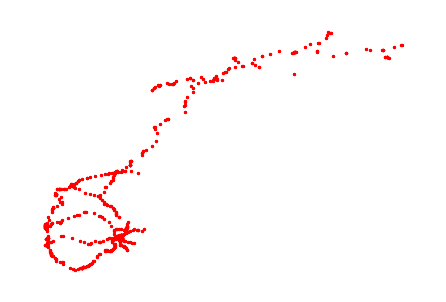

In [84]:
plot_points_nx(no_dupes)

In [108]:
import sys
!{sys.executable} -m pip install folium

  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Using cached branca-0.6.0-py3-none-any.whl (24 kB)


*#Folium method*

In [109]:
import folium



In [111]:
m = folium.Map(location=[60.472024, 8.468946], zoom_start=6)

# add a marker for each point in the dataframe
for i, row in no_dupes.iterrows():
    folium.CircleMarker([row['lat'], row['lon']],
                        radius=1,
                        color='red',
                        fill=True,
                        fill_color='red',
                        fill_opacity=0.7).add_to(m)

# display the map
m